<a name="Top"></a>

# Group Project 1

## Contents

* [Lab Description](#Lab-Description)
* [Get Data](#Get-Data)
    * [Franklin County Auditor Data](#Franklin-County-Audit-Data)
        * [Sample Franklin County Auditor Data](#SampleData)
    * [Madison and Morrow County Auditor Data](#Madison-County-Audit-Data)
* [Examine Data](#Examine-data)
    * [Decide which columns are common across counties](#Decide)
* [Merge the Counties](#Merge)
    * [Create Merge Files for each County](#Create-merge-files)
        * [Madison Merge File](#Madison-merge)
        * [Morrow Merge File](#Morrow-merge)
        * [Franklin Merge File](#Franklin-merge)
    * [Validate Columns for All Merge Files](#Validate-columns)
    * [Merge Files into One (Using APPEND)](#Append-files)
        * [Validate All 3 Counties are in the Merged File](#Validate)
* [Explore Data](#Explore-data)
    * [Get dtypes for each Column](#Check-dtypes)
    * [Describe Data](#Describe)
    * [Get Value Counts](#Get-value-counts)
    * [Check for Duplicates](#Check-duplicates)
    * [Check for NaN values](#Check-isna)
* [Clean Data](#Clean-data)
    * [Clean Data Approach](#Clean-data-appraoch)
* [Results](#Results)
* [Next Steps](#Next-Steps)


<a name="Lab-Description"></a>
## Lab Description
Your groups have been assigned by Nationwide, and now it is time to begin working together to build towards your Capstone presentations! Your first group project will be to gather the additional county auditor data, clean it, merge it, and begin to understand it for those counties that are considered part of the Columbus Ohio MSA: Franklin, Fairfield, Licking, Delaware, Hocking, Madison, Morrow, Perry, Pickaway, and Union. We have already worked with Franklin, Fairfield, and Licking County auditor datasets during Unit 2, and will continue working with these datasets, but your job as a group is to combine all pf the county datasets together.

A copy of auditor data for all of these counties is attached to this entry on Blackboard. Note that Franiklin, Fairfield, and Licking county data is not included since that data was already made available in Unit 2 Exercises. Additionally, Union County data is unavailable at this time - Bonus points to any team who can figure out how to get it!

Group Project 1 presentations will be at the beginning of class on June 20, and are to be 10 minutes or less in length. Presentations for this first group project can be done by one ore more members of the group. You will be graded on the following for this first group presentation:

- Presentation of basic statistics and charts showing how your team chose to sample (or not sample) data files, what format you stored it in, and any interesting facts you found while reviewing basic statistics about the data.
- What your team would like to study next about the data.
- Presentation succinctness: less than 10min in duration, highlight main points, highlight any key questions or concerns about the data that your team had as you performed the work.
Remember that this data can and should be used by your group during your Capstone work, so take your time building it well. This is your team's chance to perform its first practice run at presenting to an audience - enjoy it! The pressure to have robust data and impressive data visualization and modeling techniques can wait until your Capstone.


This notebook relies on the [GeoPandas](library) to process data from a [geographic information system](https://en.wikipedia.org/wiki/Geographic_information_system). 


In [33]:
import sys
!{sys.executable} -m pip install geopandas

<a name="Get-Data"></a>
### Get Auditor Data
Gather the county auditor data for those Ohio counties that are considered part of the Columbus Ohio MSA: Franklin, Fairfield, Licking, Delaware, Hocking, Madison, Morrow, Perry, Pickaway, and Union. 


<a name="Franklin-County-Audit-Data"></a>
### Get Franklin County Auditor Data


In [34]:
import pandas as pd

# load full dataset for initial analysis
franklin = pd.read_csv('../data/county_auditor/OH-Franklin/Parcel.csv')


<a name="SampleData"></a>
### Sample Franklin County Auditor Data
Franklin county auditor data containing real estate information is quite large - 400,000+ rows.  Therefore, we will sample (reduce) the data for initial data cleansing and construction for later combination with other datasets from other central Ohio counties. We will only be looking at 10% of the entire dataset. This is a somewhat arbitrary, but a good place to start, since we are unsure of what will interest us at this time.

We are calling the `sample_file()` function (in samplingu2.py) to do this. 
Two arguments are required when the function is called, `input_file` and `output_file`, to specify the source and target files, respectively. A keyword argument, `fraction`, can be specified to set the desired size of the output file relative to the input file; the default value is 0.1.


The Franklin County Auditor's website offers the ability to [generate datasets](https://apps.franklincountyauditor.com/reporter)or to download the [data files via FTP](ftp://apps.franklincountyauditor.com/).

**LETS DECIDE which is the approach we'll use here (currently using FTP, but data is old <=2015)

We will first load the data file, then sample it using the `sample_file()` function provided by samplingu2.py, and finally we will store the sampled output as a data file which we can use again in further steps.

The `pandas` package can be used to read the franklin county data file:

In [35]:
import samplingu2

# sample the data (default is 10% of all rows)
samplingu2.sample_file('../data/county_auditor/OH-Franklin/Parcel.csv', 
            '../data/county_auditor/OH-Franklin/franklin_auditor_subset.csv')
franklin = pd.read_csv('../data/county_auditor/OH-Franklin/franklin_auditor_subset.csv')

<a name="Madison-County-Audit-Data"></a>
### Madison and Morrow County Auditor Data
This data is stored as Geographic Information System (GIS) data so loading it won't be as straightforward as reading a text file. To access the data, we'll use the GeoPandas library, which will load the GIS data into a DataFrame so we can work with it in the same way as the other datasets. 


In [36]:
import geopandas
madison = geopandas.read_file("zip://../data/county_auditor/OH-Madison/Parcels.zip")
morrow = geopandas.read_file("zip://../data/county_auditor/OH-Morrow/Morrow_Parcels.zip")

[Top](#Top)

In [37]:
#Upon initial examination of the madison/morrow geopandas data, 
#we realized we have the sales data in a csv files that seems more in line with the Franklin data

madison = pd.read_csv('../data/county_auditor/OH-Madison/salesresults_2019-03-20.csv')
morrow = pd.read_csv('../data/county_auditor/OH-Morrow/salesresults_2019-03-20.csv')

NOTE:  We are not sampling Madison or Morrow county because these are very small files to begin with (<200 rows)

<a name="Examine-data"></a>
## Examine Data
We would like a glimpse of the data for each of these, so we will use the head() function

We will view the first few rows using the DataFrame's *head()* method.  We'll increase the number of columns displayed to 200 to accommodate the datasets we'll be working with. 

In [38]:
pd.set_option('display.max_column', 200)
franklin.head()

,ParcelNumber,PID,AEXMLND,AEXMBLD,AEXMTOT,APPRLND,APPRBLD,APPRTOT,AudMap,AudRtg,LandUse,Cauv,SCHOOL,HOMESTD,MAILAD1,MAILAD2,MAILAD3,MAILAD4,TRANDT,TRANYR,NAME1,NAME2,OWNER_ADD1,OWNER_ADD2,NBRHD,PCLASS,NOCARDS,ACREA,PRICE,ANN_TAX,STADDR,USPS_CITY,STATE,ZIPCODE,DESCR1,DESCR2,DESCR3,TAXDESI,AREA2,DWELTYP,ROOMS,BATHS,HBATHS,BEDRMS,AIRCOND,COND,FIREPLC,Grade,HEIGHT,NOSTORY,YEARBLT,WALL
0,010-000045,10000045.0,0,17700,17700,22600,40300,62900,D021,43.0,510.0,0.0,COLUMBUS CSD,NaN,SUSANNA K WARREN,NaN,PO BOX 44221,COLUMBUS OH 43204-0221,7/28/2011,2011.0,WARREN SUSANNA K,NaN,2705 KUNZ RD,GALLOWAY OH 43119,9400.0,R,1.0,0.0,0.0,874.88,145 N EUREKA AV,COLUMBUS,OH,43204.0,145 N EUREKA AVE,EUREKA,LOTS 27 & 28,CITY OF COLUMBUS,1848.0,1.0,9.0,1.0,NaN,5.0,1.0,A,0.0,C-1,1.0,2.0,1903.0,1.0
1,010-000061,10000061.0,0,19600,19600,6800,26400,33200,J010,48.0,510.0,0.0,COLUMBUS CSD,NaN,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004-1268,1/14/2015,2015.0,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004,1500.0,R,1.0,0.0,55000.0,572.90,801 MILLER AV,COLUMBUS,OH,43205.0,801 MILLER AVE,T MILLER,LOT 149-50-51,CITY OF COLUMBUS,1184.0,1.0,5.0,1.0,NaN,2.0,1.0,F,0.0,C-1,1.0,2.0,1913.0,1.0
2,010-000103,10000103.0,0,3300,3300,3200,6500,9700,F039,36.0,599.0,0.0,COLUMBUS CSD,NaN,INNOCENT HARSHAW,NaN,79 BREHL AVE,COLUMBUS OH 43222-1309,12/4/2008,2008.0,HARSHAW INNOCENT C,HARSHAW CINDY A,79 BREHL AVE,COLUMBUS OH 43222,9100.0,R,1.0,0.0,15000.0,141.38,THOMAS AV,COLUMBUS,OH,43223.0,1054 THOMAS AVENUE,AVONDALE,LOT 173,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,010-000129,10000129.0,0,569600,569600,196200,765800,962000,A030,1.0,401.0,0.0,COLUMBUS CSD,NaN,JASON BOWERS,NaN,4211 WOODBRIDGE RD,COLUMBUS OH 43220-4334,1/3/2002,2002.0,BOWERS JASON A,"BOWERS HARLEY M, BOWERS C",4211 WOODBRIDGE RD,COLUMBUS OH 43220,1305.0,C,3.0,0.0,825000.0,21646.66,1431 NEIL AV,COLUMBUS,OH,43201.0,1431 NEIL AVE,HOMESTEAD,LOTS 1-2-3,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,010-000004,10000004.0,0,62500,62500,14500,77000,91500,I017,80.0,520.0,0.0,COLUMBUS CSD,NaN,CENTRAL OHIO COMMUNITY IMPROVEMENT CORP,NaN,373 S HIGH ST FL 15,COLUMBUS OH 43215-6318,4/13/2015,2015.0,CENTRAL OHIO COMMUNITY IM,NaN,373 S HIGH ST 15TH FL,COLUMBUS OH 43215,1201.0,R,1.0,0.0,0.0,1671.60,1570 FRANKLIN AV,COLUMBUS,OH,43205.0,1572 FRANKLIN AVE,DODGE SUB,LOT 4,CITY OF COLUMBUS,2186.0,1.0,8.0,2.0,NaN,4.0,1.0,A,0.0,C-1,1.0,2.0,1900.0,1.0


In [39]:
# revisit - Is there a way to see datatypes for all columns?

In [40]:
pd.set_option('display.max_column', 200)
madison.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,Seller,YearBuilt,Style,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,AppraisedLandValue,AppraisedImprovementValue,AppraisedTotalValue,AssessedLandValue,AssessedImprovementValue,AssessedTotalValue,TaxableValue,Unnamed: 28
0,01-00219.001,HOSTETLER FERMAN L & MARY ELLEN HOSTETLER JT L...,5155 PRICE HILLIARDS RD,5155 PRICE HILLIARDS ROAD PLAIN CITY OH 43064,111,80.000,80.00A 7791,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,3/11/2019 12:00:00 AM,0,HOSTETLER FERMAN L & MARY ELLEN HOSTETLER JT L...,2000,F1 FRAME ONE STY,1.0,2114,6,3,0,0,2,0,259590,188600,448190,90860,66010,156870,156870,NaN
1,01-00310.000,J & M MILLS LLC,AMITY PK,154 BEECH DR DELAWARE OH 43015,100,2.453,2.4532A 1479,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/25/2019 12:00:00 AM,0,J & M MILLS LLC,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,8930,0,8930,3130,0,3130,3130,NaN
2,01-00310.000,J & M MILLS LLC,AMITY PK,154 BEECH DR DELAWARE OH 43015,100,2.453,2.4532A 1479,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/25/2019 12:00:00 AM,0,MILLER AARON P TRUSTEE,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,8930,0,8930,3130,0,3130,3130,NaN
3,01-00310.001,J & M MILLS LLC,AMITY PK,154 BEECH DR DELAWARE OH 43015,500,1.638,1.638A 1479,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/25/2019 12:00:00 AM,0,J & M MILLS LLC,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,01-00310.001,J & M MILLS LLC,AMITY PK,154 BEECH DR DELAWARE OH 43015,500,1.638,1.638A 1479,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/25/2019 12:00:00 AM,0,MILLER AARON P TRUSTEE,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [41]:
pd.set_option('display.max_column', 200)
morrow.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LegalDescription,TaxDistrict,SchoolDistrict,City,Township,NeighborhoodNumber,AnnualTax,LandUse,Acres,TransferNumber,TransferDate,TransferTypeCode,TransferTypeDescription,Buyer,Seller,Price,LandOnlySale,ValidSale,NumberOfPropertiesInSale,YearBuilt,YearRemodeled,Stories,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,FinishedLivingArea,HomesteadReduction,Reduction25,Foreclosed,NewConstruction,BoardOfRevision,DividedProperty,Unnamed: 39
0,A02-001-00-061-01,MCKENZIE GLORIA,5378 TWP 211 RD,5378 TOWNSHIP ROAD 211 MARENGO OH 43334,TWP LOT 19 MOHO REG #162 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,643.92,599,3.380,39637,2/26/2019 12:33:00 PM,3,Change Owner,MCKENZIE GLORIA,MCKENZIE DOUGLAS & GLORIA,0,N,NO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,YES,NO,NO,NO,NO,NaN
1,A02-001-00-161-02,STIFFLER ROBERT D & ROBYN,5585 CO 21 RD,5585 TOWNSHIP ROAD 21 MARENGO OH 43334,E1/2 TWP LOT 11 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,2613.08,511,2.000,39643,2/28/2019 1:42:00 PM,3,Change Owner,STIFFLER ROBERT D & ROBYN,STIFFLER ROBERT,0,N,NO,1,2003.0,0.0,1.0,5.0,3.0,0.0,0.0,2.0,0.0,1474.0,NO,NO,NO,NO,NO,NO,NaN
2,A02-001-00-180-02,CLEMONS DOUGLAS M & MAE D,4958 TWP 191 RD,11813 WINCHESTER ROAD ASHVILLE OH 43103,E 1/2 TWP LOT 40 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1040.78,599,13.020,39630,2/22/2019 12:11:00 PM,3,Change Owner,CLEMONS DOUGLAS M & MAE D,CLEMONS DOUGLAS,0,N,NO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NaN
3,B06-001-00-273-00,MURRAY BARBARA A,7346 TWP 62 RD,7346 TOWNSHIP ROAD 62 CALEDONIA OH 43314,NEPT WPT NE 1/4 ...,B06 CANAAN RIVER VALLEY,RIVER VALLEY LSD,UNINCORPORATED,CANAAN TOWNSHIP,400,2267.02,511,0.980,39635,2/25/2019 12:26:00 PM,3,Change Owner,MURRAY BARBARA A,MURRAY BILLY J JR & BARBARA A,0,N,NO,1,1974.0,0.0,1.0,5.0,3.0,0.0,0.0,2.0,0.0,1692.0,YES,YES,NO,NO,NO,NO,NaN
4,B06-001-00-323-00,COLLINS LYLE G & ERIN A,1371 RT 309 ST,1371 ST RT 309 CALEDONIA OH 43314,E1/2 NW1/4 ...,B06 CANAAN RIVER VALLEY,RIVER VALLEY LSD,UNINCORPORATED,CANAAN TOWNSHIP,400,1868.03,511,0.767,39629,2/21/2019 10:17:00 AM,3,Change Owner,COLLINS LYLE G & ERIN A,WEIR JOHN R & FLORENCE C TRUSTEES,95000,N,YES,1,1969.0,2014.0,1.0,5.0,2.0,0.0,0.0,1.0,1.0,1500.0,YES,YES,NO,NO,NO,NO,NaN


In [42]:
#Look at columns for each county's data
madison.columns.tolist()

['Parcel',
 'Owner',
 'PropertyAddress',
 'MailingAddress',
 'LandUse',
 'Acres',
 'LegalDescription',
 'NeighborhoodCode',
 'SaleDate',
 'SalePrice',
 'Seller',
 'YearBuilt',
 'Style',
 'NumberOfStories',
 'FinishedArea',
 'NumberOfRooms',
 'NumberOfBedrooms',
 'NumberOfFamilyRooms',
 'NumberOfDiningRooms',
 'NumberOfFullBaths',
 'NumberOfHalfBaths',
 'AppraisedLandValue',
 'AppraisedImprovementValue',
 'AppraisedTotalValue',
 'AssessedLandValue',
 'AssessedImprovementValue',
 'AssessedTotalValue',
 'TaxableValue',
 'Unnamed: 28']

In [43]:
morrow.columns.tolist()

['Parcel',
 'Owner',
 'PropertyAddress',
 'MailingAddress',
 'LegalDescription',
 'TaxDistrict',
 'SchoolDistrict',
 'City',
 'Township',
 'NeighborhoodNumber',
 'AnnualTax',
 'LandUse',
 'Acres',
 'TransferNumber',
 'TransferDate',
 'TransferTypeCode',
 'TransferTypeDescription',
 'Buyer',
 'Seller',
 'Price',
 'LandOnlySale',
 'ValidSale',
 'NumberOfPropertiesInSale',
 'YearBuilt',
 'YearRemodeled',
 'Stories',
 'NumberOfRooms',
 'NumberOfBedrooms',
 'NumberOfFamilyRooms',
 'NumberOfDiningRooms',
 'NumberOfFullBaths',
 'NumberOfHalfBaths',
 'FinishedLivingArea',
 'HomesteadReduction',
 'Reduction25',
 'Foreclosed',
 'NewConstruction',
 'BoardOfRevision',
 'DividedProperty',
 'Unnamed: 39']

In [44]:
franklin.columns.tolist()

['ParcelNumber',
 'PID',
 'AEXMLND',
 'AEXMBLD',
 'AEXMTOT',
 'APPRLND',
 'APPRBLD',
 'APPRTOT',
 'AudMap',
 'AudRtg',
 'LandUse',
 'Cauv',
 'SCHOOL',
 'HOMESTD',
 'MAILAD1',
 'MAILAD2',
 'MAILAD3',
 'MAILAD4',
 'TRANDT',
 'TRANYR',
 'NAME1',
 'NAME2',
 'OWNER_ADD1',
 'OWNER_ADD2',
 'NBRHD',
 'PCLASS',
 'NOCARDS',
 'ACREA',
 'PRICE',
 'ANN_TAX',
 'STADDR',
 'USPS_CITY',
 'STATE',
 'ZIPCODE',
 'DESCR1',
 'DESCR2',
 'DESCR3',
 'TAXDESI',
 'AREA2',
 'DWELTYP',
 'ROOMS',
 'BATHS',
 'HBATHS',
 'BEDRMS',
 'AIRCOND',
 'COND',
 'FIREPLC',
 'Grade',
 'HEIGHT',
 'NOSTORY',
 'YEARBLT',
 'WALL']

We will use the original documentation about the Franklin County dataset to understand the data and compare the columns in the doc to what is actually in the file.

In [45]:
# display auditor documentation in the notebook (NOTE: May not work properly in all browsers)
from IPython.display import IFrame
IFrame(src="../data/county_auditor/OH-Franklin/documentation/ParcelDataReadme.pdf", height=800, width=1024)

<a name="ID-Columns"></a>
### Decide which columns are common across Franklin, Madison and Morrow Data
To do this, we put the column names for each in an Excel workbook.  
Based on name and content, we made decisions about which columns were common across each.  

Along the way, we took notes about whether we needed to clean any of the data (ex., like merging address fields).

Please see ../data/Column mapping.xls for these details.

Now we will create a list of the columns that we identified as common across these counties. 
We copied the list from the output of the madison.columns.tolist() command we ran above and removed those that we did not need.  We also added a County field since we would want to  know which data came from which county.

In [46]:
columns = ["Parcel",
"Owner",
"PropertyAddress",
"MailingAddress",
"LandUse",
"Acres",
"LegalDescription",
"NeighborhoodCode",
"SaleDate",
"SalePrice",
"YearBuilt",
"NumberOfStories",
"FinishedArea",
"NumberOfRooms",
"NumberOfBedrooms",
"NumberOfFullBaths",
"NumberOfHalfBaths",]

<a name="Merge"></a>
## Merge the counties
To do this, will create a dataset, starting with Madison that filters on our defined columns.

For Morrow and Madison, we will have to rename some of the columns and the create subset of those based on our defined columns
Then, merge!

We will create 'merge' files for each county.
Since we are using Madison column names, we won't have to do any column renaming 

<a name="Create-merge-files"></a>
### Create Merge files for each county
These will be a copy of the original file, with columns renamed for Morrow and Franklin as needed and a Cunty column added. 


<a name="Madison-merge"></a>
#### Madison merge file
These will be a copy of the original file, adding County column. 


In [47]:
madison_merge = madison[columns].copy()
madison_merge['County'] = 'Madison'

<a name="Morrow-merge"></a>
#### Morrow merge file
Rename columns for Morrow and add a County column. 


In [48]:
morrow.rename(
    {'TransferDate': 'SaleDate',
     'Price': 'SalePrice',
     'Stories': 'NumberOfStories',
     'FinishedLivingArea': 'FinishedArea',
     'NeighborhoodNumber': 'NeighborhoodCode'
    },
    axis=1 ,
    inplace=True
)

In [49]:
morrow.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LegalDescription,TaxDistrict,SchoolDistrict,City,Township,NeighborhoodCode,AnnualTax,LandUse,Acres,TransferNumber,SaleDate,TransferTypeCode,TransferTypeDescription,Buyer,Seller,SalePrice,LandOnlySale,ValidSale,NumberOfPropertiesInSale,YearBuilt,YearRemodeled,NumberOfStories,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,FinishedArea,HomesteadReduction,Reduction25,Foreclosed,NewConstruction,BoardOfRevision,DividedProperty,Unnamed: 39
0,A02-001-00-061-01,MCKENZIE GLORIA,5378 TWP 211 RD,5378 TOWNSHIP ROAD 211 MARENGO OH 43334,TWP LOT 19 MOHO REG #162 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,643.92,599,3.380,39637,2/26/2019 12:33:00 PM,3,Change Owner,MCKENZIE GLORIA,MCKENZIE DOUGLAS & GLORIA,0,N,NO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,YES,NO,NO,NO,NO,NaN
1,A02-001-00-161-02,STIFFLER ROBERT D & ROBYN,5585 CO 21 RD,5585 TOWNSHIP ROAD 21 MARENGO OH 43334,E1/2 TWP LOT 11 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,2613.08,511,2.000,39643,2/28/2019 1:42:00 PM,3,Change Owner,STIFFLER ROBERT D & ROBYN,STIFFLER ROBERT,0,N,NO,1,2003.0,0.0,1.0,5.0,3.0,0.0,0.0,2.0,0.0,1474.0,NO,NO,NO,NO,NO,NO,NaN
2,A02-001-00-180-02,CLEMONS DOUGLAS M & MAE D,4958 TWP 191 RD,11813 WINCHESTER ROAD ASHVILLE OH 43103,E 1/2 TWP LOT 40 ...,A02 BENNINGTON CEM HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1040.78,599,13.020,39630,2/22/2019 12:11:00 PM,3,Change Owner,CLEMONS DOUGLAS M & MAE D,CLEMONS DOUGLAS,0,N,NO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NaN
3,B06-001-00-273-00,MURRAY BARBARA A,7346 TWP 62 RD,7346 TOWNSHIP ROAD 62 CALEDONIA OH 43314,NEPT WPT NE 1/4 ...,B06 CANAAN RIVER VALLEY,RIVER VALLEY LSD,UNINCORPORATED,CANAAN TOWNSHIP,400,2267.02,511,0.980,39635,2/25/2019 12:26:00 PM,3,Change Owner,MURRAY BARBARA A,MURRAY BILLY J JR & BARBARA A,0,N,NO,1,1974.0,0.0,1.0,5.0,3.0,0.0,0.0,2.0,0.0,1692.0,YES,YES,NO,NO,NO,NO,NaN
4,B06-001-00-323-00,COLLINS LYLE G & ERIN A,1371 RT 309 ST,1371 ST RT 309 CALEDONIA OH 43314,E1/2 NW1/4 ...,B06 CANAAN RIVER VALLEY,RIVER VALLEY LSD,UNINCORPORATED,CANAAN TOWNSHIP,400,1868.03,511,0.767,39629,2/21/2019 10:17:00 AM,3,Change Owner,COLLINS LYLE G & ERIN A,WEIR JOHN R & FLORENCE C TRUSTEES,95000,N,YES,1,1969.0,2014.0,1.0,5.0,2.0,0.0,0.0,1.0,1.0,1500.0,YES,YES,NO,NO,NO,NO,NaN


In [50]:
morrow_merge = morrow[columns].copy()
morrow_merge['County'] = 'Morrow'

In [51]:
morrow_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,County
0,A02-001-00-061-01,MCKENZIE GLORIA,5378 TWP 211 RD,5378 TOWNSHIP ROAD 211 MARENGO OH 43334,599,3.380,TWP LOT 19 MOHO REG #162 ...,1700,2/26/2019 12:33:00 PM,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morrow
1,A02-001-00-161-02,STIFFLER ROBERT D & ROBYN,5585 CO 21 RD,5585 TOWNSHIP ROAD 21 MARENGO OH 43334,511,2.000,E1/2 TWP LOT 11 ...,1700,2/28/2019 1:42:00 PM,0,2003.0,1.0,1474.0,5.0,3.0,2.0,0.0,Morrow
2,A02-001-00-180-02,CLEMONS DOUGLAS M & MAE D,4958 TWP 191 RD,11813 WINCHESTER ROAD ASHVILLE OH 43103,599,13.020,E 1/2 TWP LOT 40 ...,1700,2/22/2019 12:11:00 PM,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morrow
3,B06-001-00-273-00,MURRAY BARBARA A,7346 TWP 62 RD,7346 TOWNSHIP ROAD 62 CALEDONIA OH 43314,511,0.980,NEPT WPT NE 1/4 ...,400,2/25/2019 12:26:00 PM,0,1974.0,1.0,1692.0,5.0,3.0,2.0,0.0,Morrow
4,B06-001-00-323-00,COLLINS LYLE G & ERIN A,1371 RT 309 ST,1371 ST RT 309 CALEDONIA OH 43314,511,0.767,E1/2 NW1/4 ...,400,2/21/2019 10:17:00 AM,95000,1969.0,1.0,1500.0,5.0,2.0,1.0,1.0,Morrow


<a name="Franklin-merge"></a>
#### Franklin merge file
Next we will rename columns for Franklin that did not match Madison. However, before we do that, we have to mer MAILAD3 and MAILAD4 so that address will include city, state and zip. (NOTE: We identified this in our cross-column analysis)

In [52]:
#franklin['MAILAD3'] = (franklin['MAILAD3'] + ", " + franklin['MAILAD4'])
franklin.head()

,ParcelNumber,PID,AEXMLND,AEXMBLD,AEXMTOT,APPRLND,APPRBLD,APPRTOT,AudMap,AudRtg,LandUse,Cauv,SCHOOL,HOMESTD,MAILAD1,MAILAD2,MAILAD3,MAILAD4,TRANDT,TRANYR,NAME1,NAME2,OWNER_ADD1,OWNER_ADD2,NBRHD,PCLASS,NOCARDS,ACREA,PRICE,ANN_TAX,STADDR,USPS_CITY,STATE,ZIPCODE,DESCR1,DESCR2,DESCR3,TAXDESI,AREA2,DWELTYP,ROOMS,BATHS,HBATHS,BEDRMS,AIRCOND,COND,FIREPLC,Grade,HEIGHT,NOSTORY,YEARBLT,WALL
0,010-000045,10000045.0,0,17700,17700,22600,40300,62900,D021,43.0,510.0,0.0,COLUMBUS CSD,NaN,SUSANNA K WARREN,NaN,PO BOX 44221,COLUMBUS OH 43204-0221,7/28/2011,2011.0,WARREN SUSANNA K,NaN,2705 KUNZ RD,GALLOWAY OH 43119,9400.0,R,1.0,0.0,0.0,874.88,145 N EUREKA AV,COLUMBUS,OH,43204.0,145 N EUREKA AVE,EUREKA,LOTS 27 & 28,CITY OF COLUMBUS,1848.0,1.0,9.0,1.0,NaN,5.0,1.0,A,0.0,C-1,1.0,2.0,1903.0,1.0
1,010-000061,10000061.0,0,19600,19600,6800,26400,33200,J010,48.0,510.0,0.0,COLUMBUS CSD,NaN,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004-1268,1/14/2015,2015.0,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004,1500.0,R,1.0,0.0,55000.0,572.90,801 MILLER AV,COLUMBUS,OH,43205.0,801 MILLER AVE,T MILLER,LOT 149-50-51,CITY OF COLUMBUS,1184.0,1.0,5.0,1.0,NaN,2.0,1.0,F,0.0,C-1,1.0,2.0,1913.0,1.0
2,010-000103,10000103.0,0,3300,3300,3200,6500,9700,F039,36.0,599.0,0.0,COLUMBUS CSD,NaN,INNOCENT HARSHAW,NaN,79 BREHL AVE,COLUMBUS OH 43222-1309,12/4/2008,2008.0,HARSHAW INNOCENT C,HARSHAW CINDY A,79 BREHL AVE,COLUMBUS OH 43222,9100.0,R,1.0,0.0,15000.0,141.38,THOMAS AV,COLUMBUS,OH,43223.0,1054 THOMAS AVENUE,AVONDALE,LOT 173,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,010-000129,10000129.0,0,569600,569600,196200,765800,962000,A030,1.0,401.0,0.0,COLUMBUS CSD,NaN,JASON BOWERS,NaN,4211 WOODBRIDGE RD,COLUMBUS OH 43220-4334,1/3/2002,2002.0,BOWERS JASON A,"BOWERS HARLEY M, BOWERS C",4211 WOODBRIDGE RD,COLUMBUS OH 43220,1305.0,C,3.0,0.0,825000.0,21646.66,1431 NEIL AV,COLUMBUS,OH,43201.0,1431 NEIL AVE,HOMESTEAD,LOTS 1-2-3,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,010-000004,10000004.0,0,62500,62500,14500,77000,91500,I017,80.0,520.0,0.0,COLUMBUS CSD,NaN,CENTRAL OHIO COMMUNITY IMPROVEMENT CORP,NaN,373 S HIGH ST FL 15,COLUMBUS OH 43215-6318,4/13/2015,2015.0,CENTRAL OHIO COMMUNITY IM,NaN,373 S HIGH ST 15TH FL,COLUMBUS OH 43215,1201.0,R,1.0,0.0,0.0,1671.60,1570 FRANKLIN AV,COLUMBUS,OH,43205.0,1572 FRANKLIN AVE,DODGE SUB,LOT 4,CITY OF COLUMBUS,2186.0,1.0,8.0,2.0,NaN,4.0,1.0,A,0.0,C-1,1.0,2.0,1900.0,1.0


In [53]:
franklin.rename(
    {'ParcelNumber': 'Parcel',
     'MAILAD3': 'MailingAddress',
     'Stories': 'NumberOfStories',
     'TRANDT': 'SaleDate',
     'NAME1': 'Owner',
     'NBRHD': 'NeighborhoodCode',
     'ACREA': 'Acres',
     'PRICE': 'SalePrice',
     'STADDR': 'PropertyAddress',
     'DESCR3': 'LegalDescription',
     'AREA2': 'FinishedArea',
     'ROOMS': 'NumberOfRooms',
     'BATHS': 'NumberOfFullBaths',
     'HBATHS': 'NumberOfHalfBaths',
     'BEDRMS': 'NumberOfBedrooms',
     'NOSTORY': 'NumberOfStories',
     'YEARBLT': 'YearBuilt',
    },
    axis=1 ,
    inplace=True
)

In [54]:
#Preview the data to ensure the column names changed accordingly
franklin.head()

,Parcel,PID,AEXMLND,AEXMBLD,AEXMTOT,APPRLND,APPRBLD,APPRTOT,AudMap,AudRtg,LandUse,Cauv,SCHOOL,HOMESTD,MAILAD1,MAILAD2,MailingAddress,MAILAD4,SaleDate,TRANYR,Owner,NAME2,OWNER_ADD1,OWNER_ADD2,NeighborhoodCode,PCLASS,NOCARDS,Acres,SalePrice,ANN_TAX,PropertyAddress,USPS_CITY,STATE,ZIPCODE,DESCR1,DESCR2,LegalDescription,TAXDESI,FinishedArea,DWELTYP,NumberOfRooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfBedrooms,AIRCOND,COND,FIREPLC,Grade,HEIGHT,NumberOfStories,YearBuilt,WALL
0,010-000045,10000045.0,0,17700,17700,22600,40300,62900,D021,43.0,510.0,0.0,COLUMBUS CSD,NaN,SUSANNA K WARREN,NaN,PO BOX 44221,COLUMBUS OH 43204-0221,7/28/2011,2011.0,WARREN SUSANNA K,NaN,2705 KUNZ RD,GALLOWAY OH 43119,9400.0,R,1.0,0.0,0.0,874.88,145 N EUREKA AV,COLUMBUS,OH,43204.0,145 N EUREKA AVE,EUREKA,LOTS 27 & 28,CITY OF COLUMBUS,1848.0,1.0,9.0,1.0,NaN,5.0,1.0,A,0.0,C-1,1.0,2.0,1903.0,1.0
1,010-000061,10000061.0,0,19600,19600,6800,26400,33200,J010,48.0,510.0,0.0,COLUMBUS CSD,NaN,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004-1268,1/14/2015,2015.0,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004,1500.0,R,1.0,0.0,55000.0,572.90,801 MILLER AV,COLUMBUS,OH,43205.0,801 MILLER AVE,T MILLER,LOT 149-50-51,CITY OF COLUMBUS,1184.0,1.0,5.0,1.0,NaN,2.0,1.0,F,0.0,C-1,1.0,2.0,1913.0,1.0
2,010-000103,10000103.0,0,3300,3300,3200,6500,9700,F039,36.0,599.0,0.0,COLUMBUS CSD,NaN,INNOCENT HARSHAW,NaN,79 BREHL AVE,COLUMBUS OH 43222-1309,12/4/2008,2008.0,HARSHAW INNOCENT C,HARSHAW CINDY A,79 BREHL AVE,COLUMBUS OH 43222,9100.0,R,1.0,0.0,15000.0,141.38,THOMAS AV,COLUMBUS,OH,43223.0,1054 THOMAS AVENUE,AVONDALE,LOT 173,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,010-000129,10000129.0,0,569600,569600,196200,765800,962000,A030,1.0,401.0,0.0,COLUMBUS CSD,NaN,JASON BOWERS,NaN,4211 WOODBRIDGE RD,COLUMBUS OH 43220-4334,1/3/2002,2002.0,BOWERS JASON A,"BOWERS HARLEY M, BOWERS C",4211 WOODBRIDGE RD,COLUMBUS OH 43220,1305.0,C,3.0,0.0,825000.0,21646.66,1431 NEIL AV,COLUMBUS,OH,43201.0,1431 NEIL AVE,HOMESTEAD,LOTS 1-2-3,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,010-000004,10000004.0,0,62500,62500,14500,77000,91500,I017,80.0,520.0,0.0,COLUMBUS CSD,NaN,CENTRAL OHIO COMMUNITY IMPROVEMENT CORP,NaN,373 S HIGH ST FL 15,COLUMBUS OH 43215-6318,4/13/2015,2015.0,CENTRAL OHIO COMMUNITY IM,NaN,373 S HIGH ST 15TH FL,COLUMBUS OH 43215,1201.0,R,1.0,0.0,0.0,1671.60,1570 FRANKLIN AV,COLUMBUS,OH,43205.0,1572 FRANKLIN AVE,DODGE SUB,LOT 4,CITY OF COLUMBUS,2186.0,1.0,8.0,2.0,NaN,4.0,1.0,A,0.0,C-1,1.0,2.0,1900.0,1.0


In [55]:
# Look at more of the data
display(franklin)

,Parcel,PID,AEXMLND,AEXMBLD,AEXMTOT,APPRLND,APPRBLD,APPRTOT,AudMap,AudRtg,LandUse,Cauv,SCHOOL,HOMESTD,MAILAD1,MAILAD2,MailingAddress,MAILAD4,SaleDate,TRANYR,Owner,NAME2,OWNER_ADD1,OWNER_ADD2,NeighborhoodCode,PCLASS,NOCARDS,Acres,SalePrice,ANN_TAX,PropertyAddress,USPS_CITY,STATE,ZIPCODE,DESCR1,DESCR2,LegalDescription,TAXDESI,FinishedArea,DWELTYP,NumberOfRooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfBedrooms,AIRCOND,COND,FIREPLC,Grade,HEIGHT,NumberOfStories,YearBuilt,WALL
0,010-000045,10000045.0,0,17700,17700,22600,40300,62900,D021,43.0,510.0,0.0,COLUMBUS CSD,NaN,SUSANNA K WARREN,NaN,PO BOX 44221,COLUMBUS OH 43204-0221,7/28/2011,2011.0,WARREN SUSANNA K,NaN,2705 KUNZ RD,GALLOWAY OH 43119,9400.0,R,1.0,0.000,0.0,874.88,145 N EUREKA AV,COLUMBUS,OH,43204.0,145 N EUREKA AVE,EUREKA,LOTS 27 & 28,CITY OF COLUMBUS,1848.0,1.0,9.0,1.0,NaN,5.0,1.0,A,0.0,C-1,1.0,2.0,1903.0,1.0
1,010-000061,10000061.0,0,19600,19600,6800,26400,33200,J010,48.0,510.0,0.0,COLUMBUS CSD,NaN,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004-1268,1/14/2015,2015.0,QUIGLEY ENTERPRISES LLC,NaN,7069 VAN GORDON CT,ARVADA CO 80004,1500.0,R,1.0,0.000,55000.0,572.90,801 MILLER AV,COLUMBUS,OH,43205.0,801 MILLER AVE,T MILLER,LOT 149-50-51,CITY OF COLUMBUS,1184.0,1.0,5.0,1.0,NaN,2.0,1.0,F,0.0,C-1,1.0,2.0,1913.0,1.0
2,010-000103,10000103.0,0,3300,3300,3200,6500,9700,F039,36.0,599.0,0.0,COLUMBUS CSD,NaN,INNOCENT HARSHAW,NaN,79 BREHL AVE,COLUMBUS OH 43222-1309,12/4/2008,2008.0,HARSHAW INNOCENT C,HARSHAW CINDY A,79 BREHL AVE,COLUMBUS OH 43222,9100.0,R,1.0,0.000,15000.0,141.38,THOMAS AV,COLUMBUS,OH,43223.0,1054 THOMAS AVENUE,AVONDALE,LOT 173,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,010-000129,10000129.0,0,569600,569600,196200,765800,962000,A030,1.0,401.0,0.0,COLUMBUS CSD,NaN,JASON BOWERS,NaN,4211 WOODBRIDGE RD,COLUMBUS OH 43220-4334,1/3/2002,2002.0,BOWERS JASON A,"BOWERS HARLEY M, BOWERS C",4211 WOODBRIDGE RD,COLUMBUS OH 43220,1305.0,C,3.0,0.000,825000.0,21646.66,1431 NEIL AV,COLUMBUS,OH,43201.0,1431 NEIL AVE,HOMESTEAD,LOTS 1-2-3,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,010-000004,10000004.0,0,62500,62500,14500,77000,91500,I017,80.0,520.0,0.0,COLUMBUS CSD,NaN,CENTRAL OHIO COMMUNITY IMPROVEMENT CORP,NaN,373 S HIGH ST FL 15,COLUMBUS OH 43215-6318,4/13/2015,2015.0,CENTRAL OHIO COMMUNITY IM,NaN,373 S HIGH ST 15TH FL,COLUMBUS OH 43215,1201.0,R,1.0,0.000,0.0,1671.60,1570 FRANKLIN AV,COLUMBUS,OH,43205.0,1572 FRANKLIN AVE,DODGE SUB,LOT 4,CITY OF COLUMBUS,2186.0,1.0,8.0,2.0,NaN,4.0,1.0,A,0.0,C-1,1.0,2.0,1900.0,1.0
5,010-000353,10000353.0,0,0,0,1300,1300,2600,C061,88.0,400.0,0.0,COLUMBUS CSD,NaN,MAE V WELCH,NaN,6650 MILLER PAUL RD,WESTERVILLE OH 43082-9328,9/30/2003,2003.0,WELCH MAE V,NaN,6650 MILLER PAUL RD,WESTERVILLE OH 43082,1400.0,C,1.0,0.000,0.0,37.16,DICK AV,COLUMBUS,OH,43201.0,DICK AVE,ALDRICH& CRITCHFIELD,AMD ADD W 1/2 LOT 18,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,010-000135,10000135.0,0,0,0,8800,8800,17600,C013,20.0,500.0,0.0,COLUMBUS CSD,NaN,WAGENBRENNER REALTY,AKA ROYAL TALLOW HOLDINGS,575 W 1ST AVE STE 100,COLUMBUS OH 43215-5100,11/3/2010,2010.0,COLUMBUS AFFORDABLE,HOUSING LLC,PO BOX 10488,COLUMBUS OH 43201,1306.0,R,1.0,0.000,12000.0,190.96,1421 N FIFTH ST,COLUMBUS,OH,43201.0,1421 N 5TH ST,NEW INDIANOLA,LOT 195,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,010-000137,10000137.0,0,207300,207300,42700,250000,292700,C013,44.0,401.0,0.0,COLUMBUS CSD,NaN,RED MORTGAGE CAPITAL INC,LOAN SVC & ASSET MGMT,1717 MAIN STREET,DALLAS TX 75201-7054,5/24/2007,2007.0,MARIGOLD HILL LLC,NaN,NaN,NaN,1306.0,C,1.0,0.000,3828467.0,7067.48,1442 N FIFTH ST,COLUMBUS,OH,43201.0,1442-6 N5TH ST,NEW INDIANOLA,LOT 207 & PT LOT 206,CITY OF COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,010-000173,10000173.0,0,47500,47500,14500,62000,76500,D068,28.0,404.0,0.0,COLUMBUS CSD,NaN,BANK OF NEW YORK MELLON,TR,12650 INGENUITY DR,ORLANDO FL 32826-2703,5/19

In [56]:
franklin_merge = franklin[columns].copy()
#do I use .copy() at the end?
franklin_merge['County'] = 'Franklin'
franklin_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,County
0,010-000045,WARREN SUSANNA K,145 N EUREKA AV,PO BOX 44221,510.0,0.0,LOTS 27 & 28,9400.0,7/28/2011,0.0,1903.0,2.0,1848.0,9.0,5.0,1.0,NaN,Franklin
1,010-000061,QUIGLEY ENTERPRISES LLC,801 MILLER AV,7069 VAN GORDON CT,510.0,0.0,LOT 149-50-51,1500.0,1/14/2015,55000.0,1913.0,2.0,1184.0,5.0,2.0,1.0,NaN,Franklin
2,010-000103,HARSHAW INNOCENT C,THOMAS AV,79 BREHL AVE,599.0,0.0,LOT 173,9100.0,12/4/2008,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Franklin
3,010-000129,BOWERS JASON A,1431 NEIL AV,4211 WOODBRIDGE RD,401.0,0.0,LOTS 1-2-3,1305.0,1/3/2002,825000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Franklin
4,010-000004,CENTRAL OHIO COMMUNITY IM,1570 FRANKLIN AV,373 S HIGH ST FL 15,520.0,0.0,LOT 4,1201.0,4/13/2015,0.0,1900.0,2.0,2186.0,8.0,4.0,2.0,NaN,Franklin


<a name="Validate-columns"></a>
### Validate Columns for All Merge Files
Before trying to merge, we should confirm that the columns across datasets are the same using the Series eq() method. Any differences will have to be corrected before merging the data

In [57]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(morrow_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
dtype: bool

In [58]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(franklin_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
dtype: bool

We will take a last look at the columns for all the merge files 

In [59]:
display(madison_merge.columns.sort_values())
display(morrow_merge.columns.sort_values())
display(franklin_merge.columns.sort_values())

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfFullBaths', 'NumberOfHalfBaths', 'NumberOfRooms',
       'NumberOfStories', 'Owner', 'Parcel', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfFullBaths', 'NumberOfHalfBaths', 'NumberOfRooms',
       'NumberOfStories', 'Owner', 'Parcel', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfFullBaths', 'NumberOfHalfBaths', 'NumberOfRooms',
       'NumberOfStories', 'Owner', 'Parcel', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'YearBuilt'],
      dtype='object')

<a name="Append-files"></a>
### Merge files into one (using APPEND)
Since all of the columns of the 3 files match, we can use APPEND.  
NOTE:
__Pandas concat Vs append Vs join Vs merge__
* __Concat__ gives the flexibility to join based on the axis( all rows or all columns)

* __Append__ is the specific case(axis=0, join='outer') of concat

* __Join__ is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']

* __Merge__ is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

NOTE:  Came across a thread about Concat being faster than Append, would like to investigate this further

In [60]:
all_data = madison_merge.append([morrow_merge,franklin_merge], ignore_index=True, sort=True)
all_data.head()

,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,YearBuilt
0,80.000,Madison,2114.0,111.0,80.00A 7791,5155 PRICE HILLIARDS ROAD PLAIN CITY OH 43064,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,3.0,2.0,0.0,6.0,1.0,HOSTETLER FERMAN L & MARY ELLEN HOSTETLER JT L...,01-00219.001,5155 PRICE HILLIARDS RD,3/11/2019 12:00:00 AM,0.0,2000
1,2.453,Madison,0.0,100.0,2.4532A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.000,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
2,2.453,Madison,0.0,100.0,2.4532A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.000,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
3,1.638,Madison,0.0,500.0,1.638A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.001,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
4,1.638,Madison,0.0,500.0,1.638A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.001,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE


<a name="Validate"></a>
#### Validate all 3 Counties are in the merged file


In [61]:
all_data.County.value_counts()

Franklin    42871
Madison       156
Morrow         85
Name: County, dtype: int64

In [62]:
all_data.to_csv ('../data/county_auditor/all_data.csv', index = None, header=True) 

<a name="Explore-data"></a>
## Explore Data
We will use functions to explore the data a little more and seek opportunities to clean the data


<a name="Check-dtypes"></a>
### Get dtypes for each Column  
<hr>

First, we will look at the data types of each column to know what will apprear when we use the `describe()` method. NOTE:  `describe()` only shows numerics

<hr>

In [83]:
all_data.dtypes

Acres                float64
County                object
FinishedArea         float64
LandUse              float64
LegalDescription      object
MailingAddress        object
NeighborhoodCode      object
NumberOfBedrooms     float64
NumberOfFullBaths    float64
NumberOfHalfBaths    float64
NumberOfRooms        float64
NumberOfStories      float64
Owner                 object
Parcel                object
PropertyAddress       object
SaleDate              object
SalePrice            float64
YearBuilt             object
dtype: object

<a name="Describe"></a>
### Describe Data
<hr>

We can use the DataFrame `describe()` method to quickly calculate some discriptive statistics for each of the numeric columns in the dataframe.

<hr>


In [63]:
all_data.describe()

,Acres,FinishedArea,LandUse,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfRooms,NumberOfStories,SalePrice
count,43111.000000,35944.000000,42219.000000,35910.000000,35919.000000,19034.000000,35944.000000,35944.000000,4.300300e+04
mean,0.407542,1609.864289,512.478339,3.110109,1.650324,1.049438,6.313682,1.476806,2.264483e+05
std,6.515603,757.999185,48.827793,0.908076,0.676091,0.270289,1.707536,0.501866,1.455031e+06
min,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1080.000000,510.000000,3.000000,1.000000,1.000000,5.000000,1.000000,0.000000e+00
50%,0.000000,1404.000000,510.000000,3.000000,2.000000,1.000000,6.000000,1.000000,6.850000e+04
75%,0.000000,1967.000000,510.000000,4.000000,2.000000,1.000000,7.000000,2.000000,1.563125e+05
max,550.300000,30000.000000,900.000000,15.000000,9.000000,7.000000,24.000000,3.000000,1.342410e+08


<a name="Get-value-counts"></a>
### Get Value Counts
<hr>

We can we iterate through the columns of the DataFrame and display the column name with the output from the value_counts() method.

Primarily, we are interested in the numeric columns to get more insight on those.  
YearBuilt is one we want to see values on as well (at a glance, there are 'UNAVAILABLE' values) and this is non-numeric as shown in our .dtypes() result above

The non-numeric columns are:  LegalDescription, MailingAddress, NeighborhoodCode, Owner, Parcel, PropertyAddress
<hr>


In [67]:
import numpy as np

for column in all_data.columns:
    if np.issubdtype(all_data[column].dtype, np.number):
        display(column, all_data[column].value_counts())


'Acres'

0.000     41353
1.000        17
2.000        13
5.000        10
0.001         7
0.170         7
2.500         7
0.500         6
0.459         5
1.500         5
5.001         5
3.000         4
4.000         4
2.502         4
0.045         4
0.494         4
0.102         4
0.056         4
0.460         3
0.264         3
0.225         3
0.249         3
0.218         3
0.343         3
1.400         3
0.192         3
0.767         3
0.574         3
0.514         3
0.108         3
          ...  
12.727        1
2.382         1
23.759        1
0.331         1
1.004         1
1.507         1
0.109         1
1.288         1
2.343         1
0.490         1
1.089         1
2.237         1
1.114         1
30.030        1
22.050        1
11.080        1
5.010         1
20.827        1
0.539         1
2.508         1
0.566         1
0.579         1
4.742         1
6.412         1
0.833         1
31.850        1
1.907         1
3.279         1
8.377         1
13.501        1
Name: Acres, Length: 144

'FinishedArea'

1024.0     293
896.0      276
1152.0     266
1008.0     265
936.0      259
960.0      243
1040.0     216
925.0      191
1280.0     186
1028.0     182
1080.0     178
984.0      177
912.0      174
1056.0     171
1200.0     164
1344.0     152
864.0      151
1120.0     140
924.0      136
1248.0     132
672.0      126
1320.0     125
1296.0     124
952.0      122
979.0      118
1232.0     117
1224.0     117
988.0      116
1088.0     115
1208.0     112
          ... 
3818.0       1
4294.0       1
4847.0       1
621.0        1
3790.0       1
4852.0       1
2119.0       1
5476.0       1
3846.0       1
4337.0       1
3550.0       1
4718.0       1
30000.0      1
923.0        1
4198.0       1
336.0        1
3488.0       1
5345.0       1
5144.0       1
3037.0       1
614.0        1
3521.0       1
3598.0       1
3876.0       1
6100.0       1
4007.0       1
3320.0       1
5924.0       1
4329.0       1
789.0        1
Name: FinishedArea, Length: 3340, dtype: int64

'LandUse'

510.0    27556
550.0     4334
520.0     1262
511.0     1224
500.0     1148
553.0      695
401.0      437
551.0      410
640.0      328
400.0      277
501.0      264
685.0      242
552.0      214
447.0      174
599.0      174
403.0      166
680.0      143
450.0      134
499.0      129
480.0      112
456.0      111
559.0      109
455.0      108
420.0      107
660.0      101
670.0       91
610.0       90
350.0       84
101.0       73
530.0       72
         ...  
440.0        3
341.0        3
624.0        3
123.0        3
416.0        3
320.0        3
437.0        3
304.0        2
472.0        2
451.0        2
302.0        2
305.0        2
438.0        2
464.0        2
424.0        2
521.0        2
112.0        1
466.0        1
485.0        1
515.0        1
434.0        1
432.0        1
462.0        1
504.0        1
555.0        1
681.0        1
592.0        1
514.0        1
460.0        1
540.0        1
Name: LandUse, Length: 154, dtype: int64

'NumberOfBedrooms'

3.0     17914
4.0      8882
2.0      7079
5.0       632
1.0       624
6.0       621
0.0        70
8.0        43
7.0        19
10.0       11
9.0         8
12.0        3
11.0        2
15.0        1
14.0        1
Name: NumberOfBedrooms, dtype: int64

'NumberOfFullBaths'

2.0    17709
1.0    15610
3.0     2022
4.0      398
5.0       75
0.0       70
6.0       31
7.0        2
9.0        1
8.0        1
Name: NumberOfFullBaths, dtype: int64

'NumberOfHalfBaths'

1.0    17849
2.0      972
0.0      157
3.0       46
4.0        8
7.0        1
5.0        1
Name: NumberOfHalfBaths, dtype: int64

'NumberOfRooms'

6.0     9250
5.0     8257
7.0     6102
8.0     5831
4.0     3443
9.0     1229
10.0     639
12.0     435
3.0      406
11.0     111
0.0       70
14.0      45
2.0       44
13.0      24
15.0      21
16.0      17
18.0       7
1.0        5
17.0       3
24.0       2
20.0       2
23.0       1
Name: NumberOfRooms, dtype: int64

'NumberOfStories'

1.00    18079
2.00    16474
1.50      973
1.10      229
3.00       99
0.00       70
2.50       17
1.75        1
1.40        1
1.25        1
Name: NumberOfStories, dtype: int64

'SalePrice'

0.0          15764
85000.0        153
110000.0       143
120000.0       139
75000.0        136
125000.0       135
150000.0       133
145000.0       128
100000.0       126
90000.0        125
60000.0        124
40000.0        122
50000.0        117
65000.0        116
80000.0        115
140000.0       114
130000.0       113
160000.0       112
115000.0       112
95000.0        107
70000.0        106
55000.0        106
135000.0       105
45000.0        103
105000.0       102
175000.0       101
180000.0       100
30000.0        100
155000.0       100
200000.0        96
             ...  
281920.0         1
44345.0          1
127825.0         1
469000.0         1
127828.0         1
140972.0         1
3828467.0        1
314720.0         1
140930.0         1
11880.0          1
140925.0         1
255610.0         1
58850.0          1
173630.0         1
25800.0          1
222785.0         1
314510.0         1
173640.0         1
113100.0         1
281754.0         1
260764.0         1
157270.0    

In [82]:
all_data.YearBuilt.value_counts()

1900.0    1185
1959.0     759
2001.0     695
1972.0     642
2003.0     633
1999.0     625
1998.0     623
2002.0     612
1994.0     604
2004.0     598
2000.0     592
1997.0     583
1953.0     581
1962.0     577
1996.0     562
2005.0     561
1954.0     556
1987.0     554
1955.0     551
1964.0     548
1960.0     528
1956.0     527
1963.0     522
1957.0     520
1970.0     510
1988.0     504
1973.0     478
1920.0     467
1965.0     467
1989.0     466
          ... 
1960         1
1936         1
1953         1
1865.0       1
1992         1
1847         1
1967         1
1951         1
1996         1
1979         1
1976         1
1961         1
1977         1
1966         1
1887         1
2009         1
2008         1
1867.0       1
1920         1
1978         1
1959         1
1956         1
1916         1
1888.0       1
1886.0       1
1883.0       1
1881.0       1
1878.0       1
1873.0       1
1986         1
Name: YearBuilt, Length: 207, dtype: int64

In [102]:
all_data.YearBuilt.unique()

array(['1977', 'UNAVAILABLE', '1930', '2001', '1958', '1975', '1967',
       '1916', '1969', '2005', '1997', '1972', '1960', '2008', '2002',
       '1994', '1992', '1982', '1966', '1945', '1950', '1987', '1956',
       '1961', '1984', '2003', 1969.0, 1870.0, 1958.0, 2007.0, 1979.0,
       1999.0, 1906.0, 2001.0, 2000.0, 1972.0, 1954.0, 1977.0, 1913.0,
       1952.0, 1920.0, 1919.0, 1900.0, 1884.0, 1904.0, 1957.0, 2011.0,
       1923.0, 1928.0, 1910.0, 1925.0, 1987.0, 1940.0, 1909.0, 1899.0,
       1912.0, 1894.0, 1941.0, 1924.0, 1949.0, 1915.0, 2004.0, 1971.0,
       1890.0, 1911.0, 1951.0, 2005.0, 1950.0, 1914.0, 2003.0, 1945.0,
       1898.0, 1895.0, 1922.0, 1930.0, 1948.0, 1939.0, 1926.0, 1991.0,
       1937.0, 1974.0, 1918.0, 1905.0, 1908.0, 1938.0, 1880.0, 1967.0,
       1989.0, 1973.0, 2002.0, 1953.0, 1943.0, 1867.0, 1929.0, 1921.0,
       1901.0, 1936.0, 1985.0, 1927.0, 1962.0, 1946.0, 1887.0, 1907.0,
       1942.0, 1878.0, 1902.0, 1931.0, 1959.0, 1917.0, 1968.0, 1980.0,
       

<a name="Check-duplicates"></a>
### Check for Duplicates

In [78]:
temp = all_data
display("all_data")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

#Curious to see which counties represent the duplicates
temp = franklin_merge
display("franklin_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

temp = madison_merge
display("madison_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

temp = morrow_merge
display("morrow_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

'all_data'

43112

43099

0.9996984598255706

'franklin_merge'

42871

42871

1.0

'madison_merge'

156

143

0.9166666666666666

'morrow_merge'

85

85

1.0

<a name="Check-isna"></a>
### Check for NaN values

In [85]:
all_data.isna().sum()

Acres                    1
County                   0
FinishedArea          7168
LandUse                893
LegalDescription      3192
MailingAddress         378
NeighborhoodCode         1
NumberOfBedrooms      7202
NumberOfFullBaths     7193
NumberOfHalfBaths    24078
NumberOfRooms         7168
NumberOfStories       7168
Owner                    1
Parcel                   1
PropertyAddress        387
SaleDate               141
SalePrice              109
YearBuilt             7168
dtype: int64

Note that Finished Area and NumberOf... values are all roughly the same (close to 7168).  I wonder if this is because these are land plots vs. homes?  We can cross-check the [land use code](http://codes.ohio.gov/oac/5703-25-10) with these to see if this is the case.

In [90]:
temp = all_data[all_data.FinishedArea.isna()]
temp.head(20)
temp.LandUse.value_counts()

500.0    1118
510.0     499
401.0     397
400.0     276
640.0     265
501.0     264
685.0     232
447.0     172
403.0     155
450.0     134
599.0     121
499.0     118
480.0     112
456.0     111
559.0     108
420.0     106
455.0     105
660.0     101
553.0      98
680.0      96
610.0      89
670.0      89
511.0      86
350.0      84
429.0      64
435.0      60
650.0      58
404.0      57
550.0      54
442.0      53
         ... 
419.0       3
437.0       3
124.0       3
560.0       3
446.0       3
341.0       3
423.0       3
342.0       3
488.0       3
464.0       2
302.0       2
438.0       2
305.0       2
304.0       2
123.0       2
424.0       2
451.0       2
541.0       1
112.0       1
462.0       1
485.0       1
460.0       1
585.0       1
432.0       1
434.0       1
504.0       1
681.0       1
466.0       1
555.0       1
513.0       1
Name: LandUse, Length: 146, dtype: int64

With the exception of 510.0 - 530.0 (Single family dwelling), the others would make sense not to have Finished areas as they are agricultural or unlplatted lots or other structures.  

<a name="Clean-data"></a>
## Clean Data
Now that we can see some of the values in more detail, we can clean up some of the data

<a name="Clean-data-approach"></a>
### Clean Data Approach
* For Half bath, make the NaN = 0 
    * We do not wish to eliminate all rows with HalfBaths hainv NaN, that would be more than 1/2 of the rows
    * Instead, we will assume a value of 0 for those that are NaN
    * Make sure we do this before removing rows that have NaN 
* Eliminate all rows that have NaN values for 
    * Acres
    * Finished Area
    * Land Use
    * NeighborhoodCode
    * NumberOf fields (Bedrooms, Bathrooms, Roooms, Stories)
    * Owner, Parcel, 
    * PropertyAddress (Could be valid, ex., no assigned address, just GIS coordinates or LOT#, but we are choosing not to look at these in our analysis) 
    * SaleDate
    * SalePrice
* Eliminate duplicates
* For SalePrice, only use values > 0 and eliminate the 4th quartile to eliminate the anomolies
* For YearBuilt, eliminate 'UNAVAILABLE' rows, only use values > 0 and not blanks (NOTE:  In Excel, this is 7,168)
    * Make this and integer data type

**Team Decision:  Do we eliminate Acreage = 0?  That will just leave us with roughly 2000 recs.  
*** Eliminate all rows that have zero values for 
    * Finished Area
    * NumberOf fields (Bedrooms, FullBath, HalBaths, Rooms, Stories)?
*** Or maybe hone on on specific Land Use Codes?

<a name="Half-bath"></a>
### Half Bath NaN = 0

In [92]:
# Display first rows of our data where NumberOfHalfBaths isna()
all_data[all_data.NumberOfHalfBaths.isna()].head()


In [ ]:
all_data.NumberOfHalfBaths = all_data.NumberOfHalfBaths.fillna(value=0)

In [93]:
# Display again, should get no rows
all_data[all_data.NumberOfHalfBaths.isna()].head()

,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,YearBuilt


<a name="Eliminate-nan"></a>
### Eliminate NaN 

In [94]:
all_data = all_data[all_data.Acres.notna()]
all_data = all_data[all_data.FinishedArea.notna()]
all_data = all_data[all_data.LandUse.notna()]
all_data = all_data[all_data.NeighborhoodCode.notna()]
all_data = all_data[all_data.NumberOfBedrooms.notna()]
all_data = all_data[all_data.NumberOfFullBaths.notna()]
all_data = all_data[all_data.NumberOfHalfBaths.notna()]
all_data = all_data[all_data.NumberOfRooms.notna()]
all_data = all_data[all_data.NumberOfStories.notna()]
all_data = all_data[all_data.Owner.notna()]
all_data = all_data[all_data.Parcel.notna()]
all_data = all_data[all_data.PropertyAddress.notna()]
all_data = all_data[all_data.SaleDate.notna()]
all_data = all_data[all_data.SalePrice.notna()]
# Check the number of NaN values again
all_data.isna().sum()

Acres                   0
County                  0
FinishedArea            0
LandUse                 0
LegalDescription     2480
MailingAddress        166
NeighborhoodCode        0
NumberOfBedrooms        0
NumberOfFullBaths       0
NumberOfHalfBaths       0
NumberOfRooms           0
NumberOfStories         0
Owner                   0
Parcel                  0
PropertyAddress         0
SaleDate                0
SalePrice               0
YearBuilt               0
dtype: int64

In [95]:
# Look at how this impacted counts
all_data.County.value_counts()

Franklin    35325
Madison       156
Morrow         32
Name: County, dtype: int64

<a name="Eliminate-dups"></a>
### Eliminate Duplicates 

In [96]:
all_data.drop_duplicates()


,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfFullBaths,NumberOfHalfBaths,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,YearBuilt
0,80.000,Madison,2114.0,111.0,80.00A 7791,5155 PRICE HILLIARDS ROAD PLAIN CITY OH 43064,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,3.0,2.0,0.0,6.0,1.0,HOSTETLER FERMAN L & MARY ELLEN HOSTETLER JT L...,01-00219.001,5155 PRICE HILLIARDS RD,3/11/2019 12:00:00 AM,0.0,2000
1,2.453,Madison,0.0,100.0,2.4532A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.000,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
3,1.638,Madison,0.0,500.0,1.638A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00310.001,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
5,2.510,Madison,0.0,100.0,2.5099A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00312.000,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
7,2.054,Madison,0.0,500.0,2.0541A 1479,154 BEECH DR DELAWARE OH 43015,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0.0,0.0,0.0,J & M MILLS LLC,01-00312.002,AMITY PK,2/25/2019 12:00:00 AM,0.0,UNAVAILABLE
9,4.190,Madison,0.0,110.0,4.197A,PO BOX 21214 UPPER ARLINGTON OH 43221,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,0.0,0.0,0.0,0.0,0.0,MORELOCK CRAIG D,01-00593.000,CARTERS MILL RD,3/12/2019 12:00:00 AM,0.0,UNAVAILABLE
11,2.000,Madison,1442.0,511.0,2.006A 6508,5420 KILBURY HUBER ROAD PLAIN CITY OH 43064,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,3.0,2.0,0.0,6.0,1.0,BURNS SANDRA KAY AS TRUSTEE OF THE WILSON FAMI...,01-00602.004,5420 KILBURY HUBER RD,3/14/2019 12:00:00 AM,0.0,1995
13,2.438,Madison,1260.0,510.0,2.4384A 7059 ETC,%CORELOGIC 3001 HACKBERRY IRVING TX 75063,0259025 - DARBY TWP JONATHAN ALDER SD BASE,3.0,1.0,0.0,5.0,1.0,WEIZENECKER DANIEL B & DARLING MELISSA A JT LIVES,02-00030.002,10795 DEBOLT RD,2/22/2019 12:00:00 AM,0.0,1994
14,4.950,Madison,2111.0,510.0,4.947A 3685,%WELLS FARGO 1 HOME CAMPUS ST DES MOINES IA 50328,0259025 - DARBY TWP JONATHAN ALDER SD BASE,3.0,2.0,0.0,6.0,1.0,HUFF KAYLA L & MICHAEL R JT LIVES,02-00060.000,8518 CEMETERY PK,3/6/2019 12:00:00 AM,0.0,1930
16,1.000,Madison,2847.0,510.0,1.00A 8539,10500 CONVERSE CHAPEL RD PLAIN CITY OH 43064,0259025 - DARBY TWP JONATHAN ALDER SD BASE,3.0,2.0,0.0,6.0,1.0,HOSTETLER THOMAS D & DELORES ANN JT LIVES,02-00113.001,10500 CONVERSE CHAPEL RD,3/13/2019 12:00:00 AM,0.0,1969


In [97]:
# Look at how this impacted counts
all_data.County.value_counts()

Franklin    35325
Madison       156
Morrow         32
Name: County, dtype: int64

<a name="Saleprice-drop"></a>
### Drop 1st and 4th quartile SalesPrices 

In [100]:
all_data = all_data[all_data.SalePrice > 0.0]
all_data = all_data[all_data.SalePrice < 1500000]
display(all_data.SalePrice.describe())
all_data.County.value_counts()

count    2.351500e+04
mean     1.546939e+05
std      1.321078e+05
min      5.000000e+00
25%      7.790000e+04
50%      1.277000e+05
75%      1.875075e+05
max      1.474000e+06
Name: SalePrice, dtype: float64

Franklin    23432
Madison        69
Morrow         14
Name: County, dtype: int64

<a name="YearBuilt-cleanup"></a>
### Filter YearBuilt 

In [103]:
all_data = all_data[all_data.YearBuilt != 'UNAVAILABLE']
all_data.YearBuilt.unique()
#all_data.County.value_counts()

array(['1977', '1930', '2001', '1958', '1975', '1967', '1916', '1969',
       '2005', '1997', '1972', '1960', '2008', '2002', '1994', '1992',
       '1982', '1966', '1945', '1950', '1987', '1956', '1961', '1984',
       '2003', 1969.0, 1870.0, 1958.0, 2007.0, 1979.0, 1999.0, 1906.0,
       2001.0, 2000.0, 1972.0, 1954.0, 1977.0, 1913.0, 1952.0, 1920.0,
       1919.0, 1900.0, 1884.0, 1904.0, 1957.0, 2011.0, 1923.0, 1928.0,
       1910.0, 1925.0, 1987.0, 1940.0, 1909.0, 1899.0, 1912.0, 1894.0,
       1941.0, 1924.0, 1949.0, 1915.0, 2004.0, 1971.0, 1890.0, 1911.0,
       1951.0, 2005.0, 1950.0, 1914.0, 2003.0, 1945.0, 1898.0, 1895.0,
       1922.0, 1930.0, 1948.0, 1939.0, 1926.0, 1991.0, 1937.0, 1974.0,
       1918.0, 1905.0, 1908.0, 1938.0, 1880.0, 1967.0, 1989.0, 1973.0,
       2002.0, 1953.0, 1943.0, 1867.0, 1929.0, 1921.0, 1901.0, 1936.0,
       1985.0, 1927.0, 1962.0, 1946.0, 1887.0, 1907.0, 1942.0, 1878.0,
       1902.0, 1931.0, 1959.0, 1917.0, 1968.0, 1980.0, 1889.0, 1964.0,
      

In [104]:
all_data.YearBuilt.value_counts()

1900.0    690
2003.0    489
2004.0    469
1994.0    464
2001.0    463
2005.0    462
1998.0    444
1999.0    436
2002.0    430
1987.0    415
2000.0    410
1997.0    409
1959.0    407
1996.0    398
1972.0    391
1988.0    382
1992.0    371
2006.0    359
1989.0    345
1953.0    334
1991.0    329
1954.0    328
1993.0    326
1986.0    324
1995.0    324
1985.0    320
1962.0    316
1956.0    315
1955.0    314
1957.0    307
         ... 
1960        1
1975        1
1966        1
1987        1
1882.0      1
1945        1
1958        1
1961        1
2001        1
2008        1
1992        1
2005        1
2002        1
1840.0      1
1837.0      1
1881.0      1
1855.0      1
1857.0      1
1956        1
1863.0      1
1865.0      1
1867.0      1
1868.0      1
1967        1
1873.0      1
1896.0      1
1889.0      1
1878.0      1
1888.0      1
1916        1
Name: YearBuilt, Length: 176, dtype: int64

In [112]:
for index, row in all_data.iterrows():
    new_value = str(row.YearBuilt)
    new_value = new_value.replace('.0', '')  
    new_value = int(new_value)
    all_data.loc[index, 'YearBuilt'] = new_value
#NOTE:  Look for a more efficient way to do this!  This took a while and machine was running hot!

In [113]:
all_data.YearBuilt.unique()

array([1977, 1930, 2001, 1958, 1975, 1967, 1916, 1969, 2005, 1997, 1972,
       1960, 2008, 2002, 1994, 1992, 1982, 1966, 1945, 1950, 1987, 1956,
       1961, 1984, 2003, 1870, 2007, 1979, 1999, 1906, 2000, 1954, 1913,
       1952, 1920, 1919, 1900, 1884, 1904, 1957, 2011, 1923, 1928, 1910,
       1925, 1940, 1909, 1899, 1912, 1894, 1941, 1924, 1949, 1915, 2004,
       1971, 1890, 1911, 1951, 1914, 1898, 1895, 1922, 1948, 1939, 1926,
       1991, 1937, 1974, 1918, 1905, 1908, 1938, 1880, 1989, 1973, 1953,
       1943, 1867, 1929, 1921, 1901, 1936, 1985, 1927, 1962, 1946, 1887,
       1907, 1942, 1878, 1902, 1931, 1959, 1917, 1968, 1980, 1889, 1964,
       1893, 1988, 1885, 2012, 1935, 1993, 1963, 1932, 1877, 1934, 2006,
       1888, 1860, 2009, 1850, 1995, 1891, 1990, 2010, 1871, 1800, 1965,
       1903, 1983, 1981, 1944, 1998, 1955, 1892, 1881, 1897, 1978, 1896,
       1970, 1947, 1882, 1879, 1996, 1976, 1933, 2013, 1986, 1868, 1840,
       1873, 1857, 1875, 1865, 1837, 1855, 1863, 18

<a name="Explore-data-2"></a>
## Explore Data II
We will use charts and graphs to explore the data a little more and also seek opportunities to clean the data further


In [116]:
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1346a1a58>,
      dtype=object)

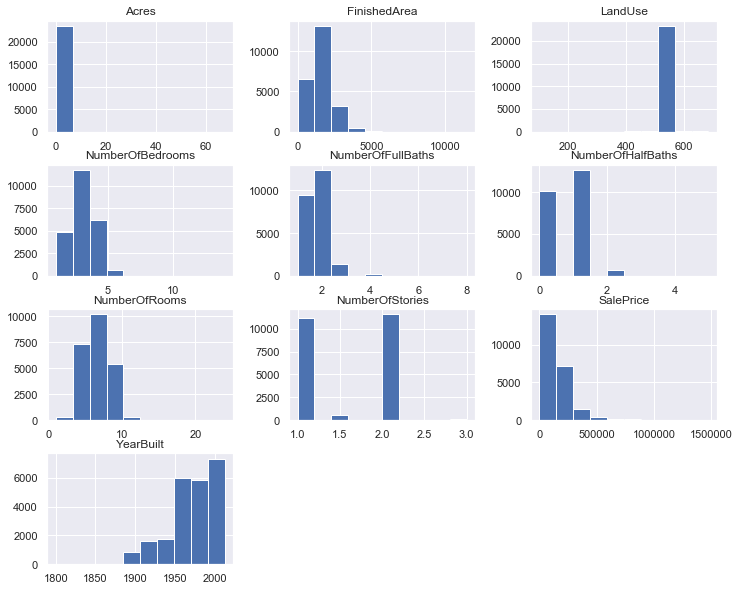

In [117]:
all_data.hist()

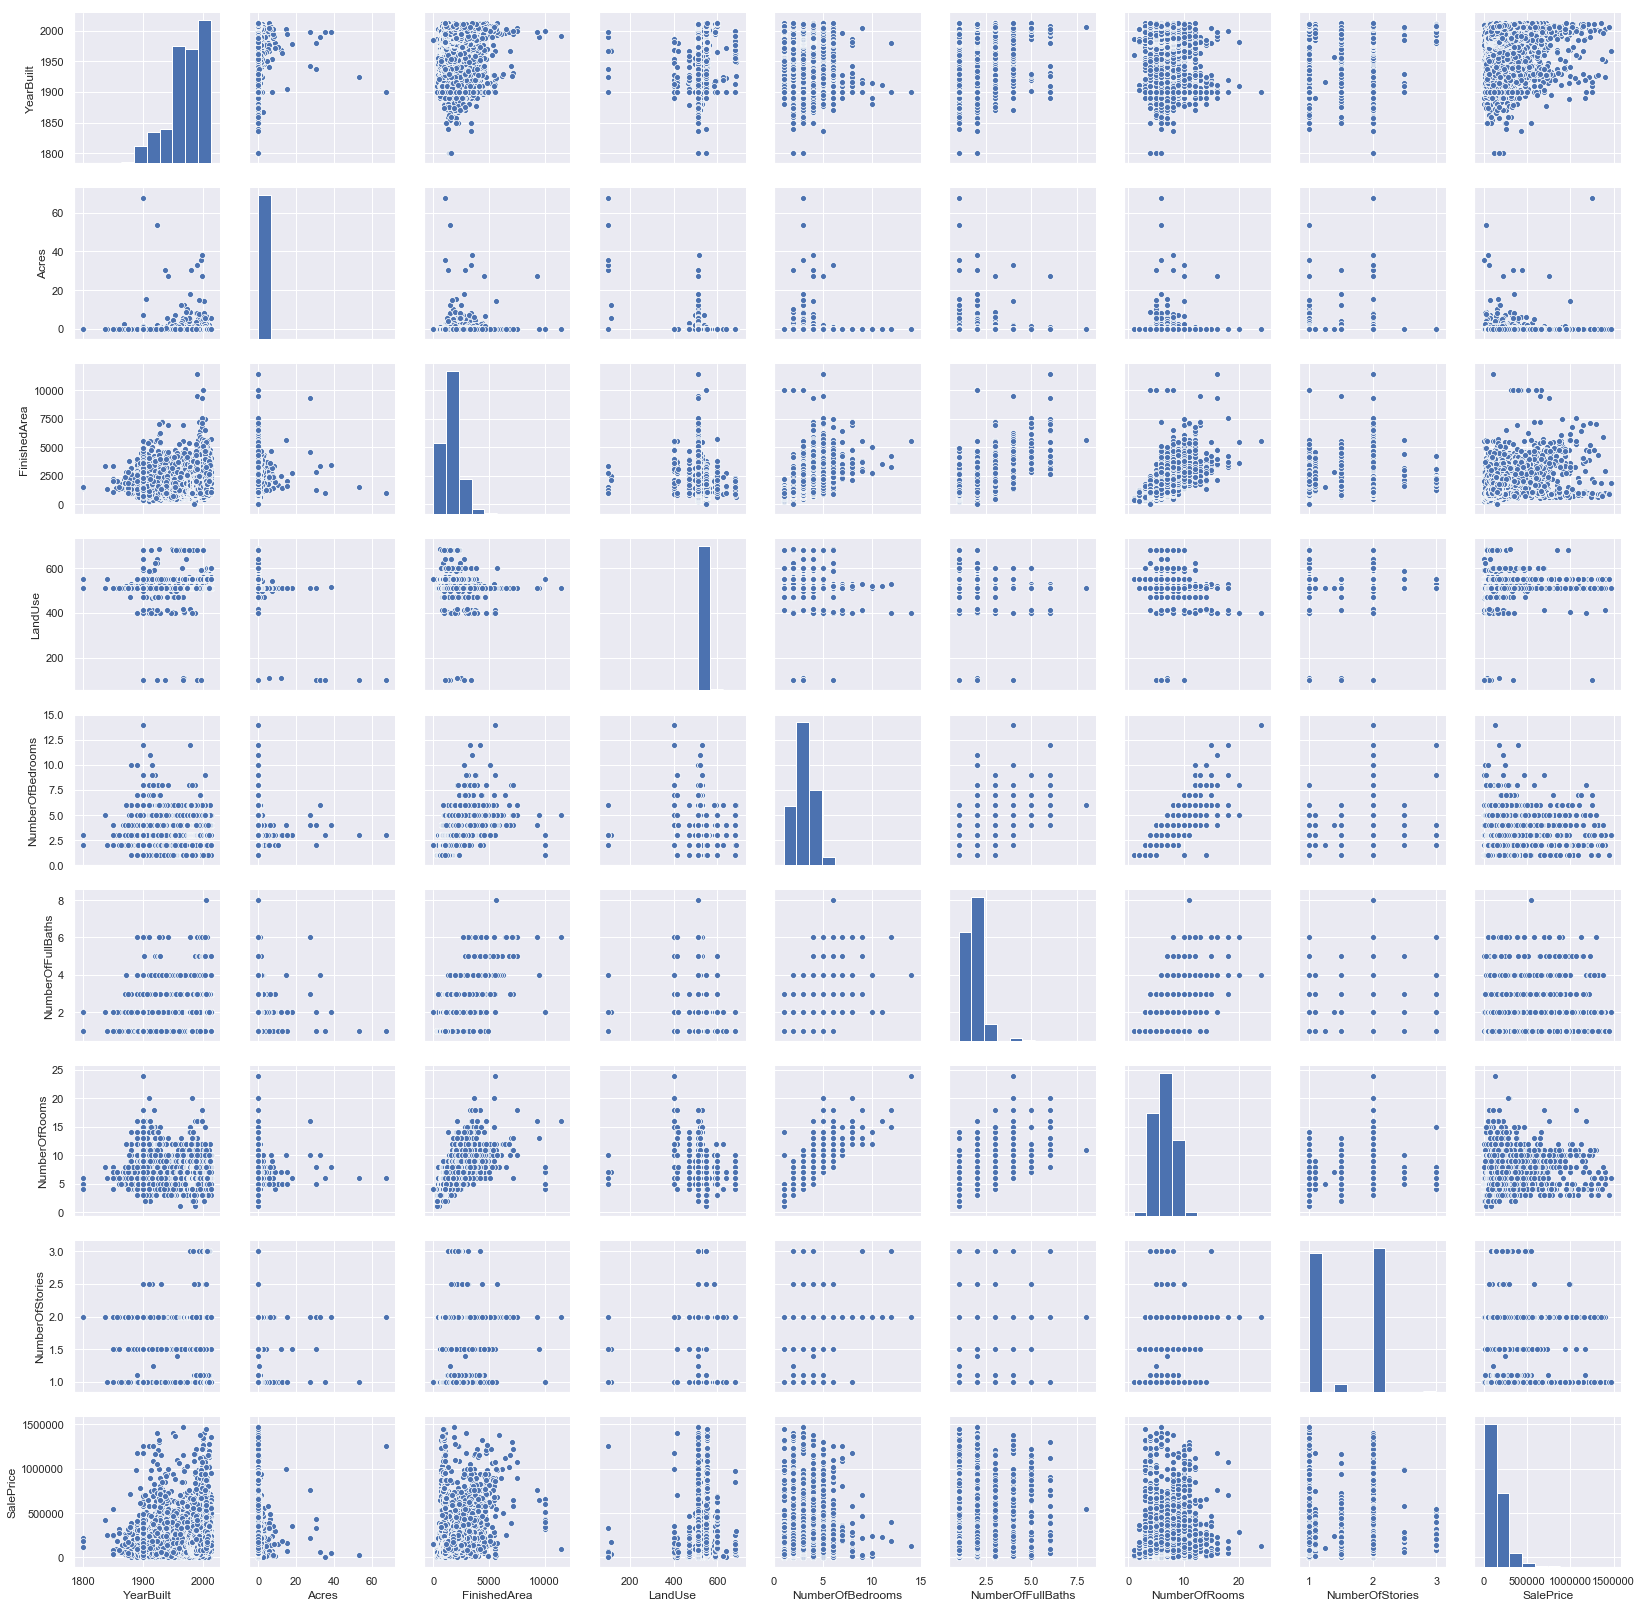

In [118]:
columns = [ "YearBuilt", "Acres", "FinishedArea", "LandUse", "NumberOfBedrooms", "NumberOfFullBaths", "NumberOfRooms", "NumberOfStories", "SalePrice"]
sns.pairplot(all_data[columns])

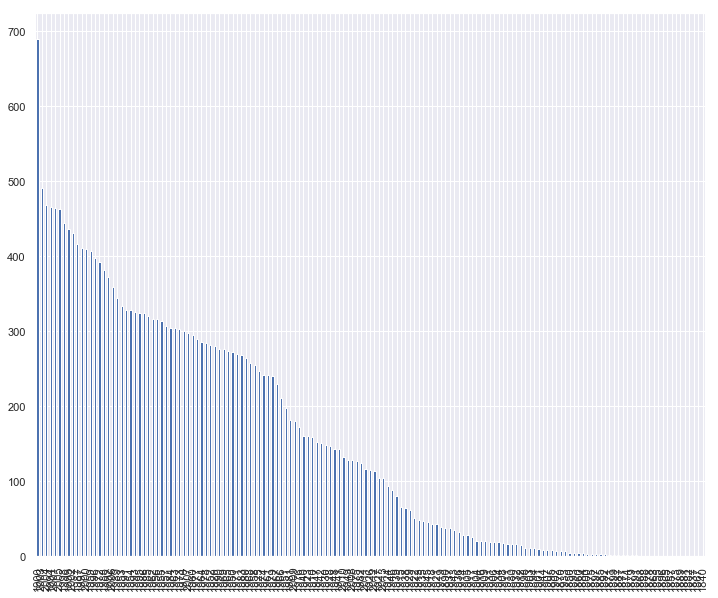

In [120]:
all_data['YearBuilt'].value_counts().plot(kind="bar")

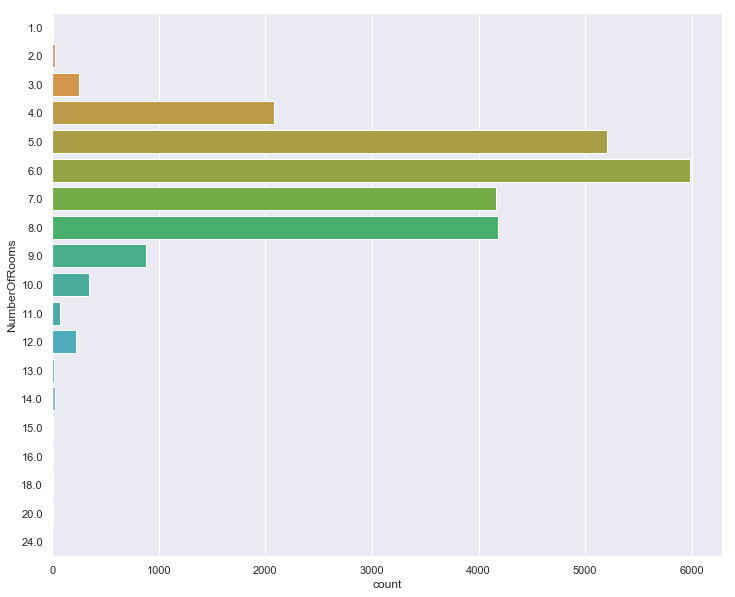

In [122]:
sns.countplot(y=all_data['NumberOfRooms'])

In [123]:
all_data.groupby(["County", "LandUse"]).size()

County    LandUse
Franklin  101.0          6
          111.0          1
          401.0         23
          402.0          1
          403.0          3
          404.0          1
          414.0          7
          415.0          2
          419.0          2
          467.0          1
          470.0         29
          471.0          6
          472.0          1
          499.0          5
          510.0      18213
          511.0        601
          512.0         13
          513.0          3
          514.0          1
          520.0        640
          530.0         37
          550.0       3341
          551.0        233
          552.0         82
          553.0         67
          559.0          1
          560.0          3
          585.0          2
          591.0         30
          592.0          1
          599.0         29
          624.0          2
          640.0          4
          680.0         37
          685.0          4
Madison   111.0          1
          

In [ ]:
sns.pairplot(all_data[columns], hue="FinishedArea")

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
sns.boxplot(x="SalePrice", y="YearBuilt", data=df_redux)